#### Catch22 features for all dataset

In [43]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.dataset.util import to_pandas
from gluonts.dataset.common import ListDataset
import pycatch22

/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
data = pd.DataFrame()
for i in ["electricity", "traffic", "m4_hourly", "m4_daily", "m4_weekly", "m4_monthly", "m4_quarterly", "solar-energy"]:
   dataset = get_dataset(i)
   train_ds = ListDataset(dataset.train, freq=dataset.metadata.freq)
   dff = pd.DataFrame()
   for ts in iter(train_ds):
      train_series = to_pandas(ts)
      df = pd.DataFrame(pycatch22.catch22_all(list(train_series)))
      df = df.T
      new_header = df.iloc[0] #grab the first row for the header
      df = df[1:] #take the data less the header row
      df.columns = new_header #set the header row as the df header
      
      dff = dff.append(df)
   dff = dff.reset_index(drop=True)
   data = data.append(pd.DataFrame(dff.mean(axis=0)).T.reset_index(drop=True))
   
data['dataset'] = ["electricity", "traffic", "m4_hourly", "m4_daily", "m4_weekly", "m4_monthly", "m4_quarterly", "solar-energy"]
data.to_csv('catch22.csv', index=False)

### Regression experiments

In [1]:
import pandas as pd
# import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:

from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split
from sklearn.linear_model import ElasticNet

In [45]:
df = pd.read_csv("df.csv")
catch22 = pd.read_csv("catch22.csv")
data = df.merge(catch22, how='left', on="dataset")

In [46]:
data.head()

,model,error,dataset,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,transformer,0.071823,electricity,-0.028579,-0.015877,68.972046,11.551402,0.328209,0.034421,0.796559,...,0.530281,-0.110817,0.019799,0.922117,13.551402,1.666226,0.551215,0.500312,0.237013,0.612052
1,transformer,0.142111,traffic,-0.218283,-0.272866,3.967025,11.607889,0.127119,-0.047471,0.821459,...,0.424628,0.044064,-0.015226,0.819510,16.247100,1.656631,0.182877,0.602227,0.285211,0.764539
2,transformer,0.081466,m4_hourly,-0.406036,-0.565346,5.103959,11.608696,0.492538,0.008895,0.885336,...,0.677594,0.181327,-0.199676,0.934384,13.978261,1.622224,0.236598,0.529259,0.265386,0.567447
3,transformer,0.066343,m4_daily,-0.172686,-0.206331,290.202151,720.344689,1.074898,-0.029044,0.434763,...,0.016825,0.234980,-0.265987,0.983666,9.890229,1.309419,0.429876,0.653066,0.018977,0.124719
4,transformer,0.155053,m4_weekly,-0.377490,-0.441451,126.895132,326.000000,0.796780,0.008714,0.532645,...,0.034918,0.307455,-0.174684,0.902329,9.495822,1.490107,0.400648,0.662246,0.086446,0.296566


In [135]:
corr = data[data['model']=='transformer'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/d0/l9cqdxf90hbg0dj97q8bs7kc0000gn/T/ipykernel_76447/2251774514.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,error,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
error,1.00,0.13,0.27,-0.37,-0.07,-0.30,-0.10,-0.15,-0.39,-0.28,0.06,-0.18,-0.20,0.37,-0.43,0.15,-0.00,0.20,-0.08,-0.44,0.21,0.33,0.24
DN_HistogramMode_5,0.13,1.00,0.98,-0.20,-0.12,-0.85,-0.18,0.36,-0.41,-0.65,0.20,-0.51,-0.48,-0.10,-0.20,0.72,-0.74,0.25,0.52,-0.74,-0.44,0.38,0.63
DN_HistogramMode_10,0.27,0.98,1.00,-0.21,-0.02,-0.83,-0.12,0.29,-0.41,-0.65,0.32,-0.43,-0.42,-0.07,-0.17,0.68,-0.61,0.20,0.42,-0.81,-0.37,0.34,0.55
CO_f1ecac,-0.37,-0.20,-0.21,1.00,0.49,0.36,0.11,-0.43,0.92,0.39,0.38,0.42,0.59,-0.72,0.42,-0.38,0.28,-0.69,-0.41,0.18,-0.17,-0.72,-0.59
CO_FirstMin_ac,-0.07,-0.12,-0.02,0.49,1.00,0.51,-0.03,-0.81,0.65,0.58,0.90,0.90,0.88,-0.47,0.69,-0.69,0.48,-0.44,-0.87,-0.29,0.48,-0.47,-0.80
CO_HistogramAMI_even_2_5,-0.30,-0.85,-0.83,0.36,0.51,1.00,0.17,-0.67,0.66,0.93,0.13,0.82,0.82,-0.29,0.62,-0.89,0.72,-0.47,-0.77,0.43,0.48,-0.56,-0.87
CO_trev_1_num,-0.10,-0.18,-0.12,0.11,-0.03,0.17,1.00,0.25,0.08,0.03,-0.05,0.01,-0.02,-0.27,0.52,0.22,0.55,-0.70,0.12,-0.00,-0.54,-0.71,-0.30
MD_hrv_classic_pnn40,-0.15,0.36,0.29,-0.43,-0.81,-0.67,0.25,1.00,-0.68,-0.80,-0.56,-0.85,-0.91,0.43,-0.49,0.83,-0.37,0.36,0.94,0.18,-0.62,0.32,0.73
SB_BinaryStats_mean_longstretch1,-0.39,-0.41,-0.41,0.92,0.65,0.66,0.08,-0.68,1.00,0.72,0.41,0.68,0.83,-0.75,0.62,-0.66,0.41,-0.72,-0.66,0.19,0.08,-0.75,-0.79
SB_TransitionMatrix_3ac_sumdiagcov,-0.28,-0.65,-0.65,0.39,0.58,0.93,0.03,-0.80,0.72,1.00,0.18,0.82,0.88,-0.51,0.68,-0.85,0.48,-0.49,-0.79,0.18,0.43,-0.50,-0.80


In [15]:
corr = data[data['model']=='Hopfield'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/d0/l9cqdxf90hbg0dj97q8bs7kc0000gn/T/ipykernel_76447/922814538.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,error,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
error,1.00,0.25,0.27,-0.51,-0.43,-0.52,0.02,0.19,-0.60,-0.49,-0.25,-0.52,-0.55,0.47,-0.50,0.32,-0.20,0.28,0.29,-0.20,-0.06,0.45,0.54
DN_HistogramMode_5,0.25,1.00,0.53,-0.18,-0.10,-0.80,-0.49,0.33,-0.40,-0.48,0.23,-0.49,-0.45,-0.05,-0.46,0.58,-0.76,0.22,0.48,-0.57,-0.37,0.51,0.62
DN_HistogramMode_10,0.27,0.53,1.00,0.14,0.20,-0.66,0.44,-0.25,-0.00,-0.70,0.43,-0.05,-0.10,0.16,0.21,-0.28,-0.37,0.56,-0.11,0.27,0.39,0.31,0.34
CO_f1ecac,-0.51,-0.18,0.14,1.00,0.49,0.27,0.49,-0.46,0.92,0.19,0.39,0.44,0.58,-0.73,0.67,-0.42,0.28,-0.53,-0.43,0.33,-0.07,-0.81,-0.56
CO_FirstMin_ac,-0.43,-0.10,0.20,0.49,1.00,0.45,0.29,-0.80,0.65,0.42,0.90,0.90,0.88,-0.50,0.82,-0.58,0.48,-0.36,-0.86,-0.02,0.47,-0.55,-0.78
CO_HistogramAMI_even_2_5,-0.52,-0.80,-0.66,0.27,0.45,1.00,0.12,-0.51,0.57,0.89,0.07,0.74,0.77,-0.38,0.57,-0.48,0.70,-0.54,-0.65,0.13,0.26,-0.64,-0.85
CO_trev_1_num,0.02,-0.49,0.44,0.49,0.29,0.12,1.00,-0.51,0.49,-0.26,0.23,0.41,0.33,0.13,0.67,-0.80,0.49,0.17,-0.55,0.85,0.61,-0.39,-0.34
MD_hrv_classic_pnn40,0.19,0.33,-0.25,-0.46,-0.80,-0.51,-0.51,1.00,-0.70,-0.45,-0.56,-0.84,-0.87,0.44,-0.88,0.82,-0.38,0.18,0.94,-0.25,-0.66,0.44,0.67
SB_BinaryStats_mean_longstretch1,-0.60,-0.40,-0.00,0.92,0.65,0.57,0.49,-0.70,1.00,0.48,0.41,0.69,0.82,-0.76,0.84,-0.63,0.42,-0.55,-0.68,0.34,0.16,-0.84,-0.76
SB_TransitionMatrix_3ac_sumdiagcov,-0.49,-0.48,-0.70,0.19,0.42,0.89,-0.26,-0.45,0.48,1.00,0.06,0.60,0.71,-0.60,0.37,-0.19,0.39,-0.65,-0.49,-0.26,0.00,-0.50,-0.70


In [16]:
corr = data[data['model']=='switch'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/d0/l9cqdxf90hbg0dj97q8bs7kc0000gn/T/ipykernel_76447/4093997848.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,error,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
error,1.00,0.28,0.35,-0.54,-0.53,-0.56,-0.06,0.28,-0.65,-0.53,-0.35,-0.63,-0.62,0.46,-0.70,0.62,-0.30,0.34,0.42,-0.37,-0.18,0.49,0.61
DN_HistogramMode_5,0.28,1.00,0.98,-0.11,-0.04,-0.85,-0.62,0.24,-0.34,-0.64,0.29,-0.45,-0.42,-0.00,-0.41,0.67,-0.75,0.41,0.43,-0.70,-0.30,0.52,0.62
DN_HistogramMode_10,0.35,0.98,1.00,-0.13,0.06,-0.83,-0.50,0.17,-0.35,-0.65,0.41,-0.37,-0.36,0.03,-0.35,0.64,-0.62,0.34,0.33,-0.78,-0.22,0.45,0.53
CO_f1ecac,-0.54,-0.11,-0.13,1.00,0.45,0.32,0.44,-0.35,0.91,0.37,0.35,0.37,0.55,-0.87,0.62,-0.28,0.26,-0.86,-0.33,0.08,-0.50,-0.85,-0.57
CO_FirstMin_ac,-0.53,-0.04,0.06,0.45,1.00,0.49,0.18,-0.82,0.62,0.57,0.90,0.90,0.88,-0.57,0.89,-0.69,0.47,-0.57,-0.88,-0.42,0.45,-0.56,-0.79
CO_HistogramAMI_even_2_5,-0.56,-0.85,-0.83,0.32,0.49,1.00,0.44,-0.66,0.64,0.93,0.09,0.81,0.81,-0.37,0.79,-0.95,0.71,-0.58,-0.78,0.39,0.48,-0.64,-0.86
CO_trev_1_num,-0.06,-0.62,-0.50,0.44,0.18,0.44,1.00,-0.10,0.41,0.19,0.12,0.30,0.28,-0.11,0.35,-0.28,0.86,-0.70,-0.32,0.39,-0.16,-0.78,-0.60
MD_hrv_classic_pnn40,0.28,0.24,0.17,-0.35,-0.82,-0.66,-0.10,1.00,-0.64,-0.83,-0.54,-0.84,-0.91,0.66,-0.84,0.79,-0.37,0.60,0.93,0.42,-0.47,0.50,0.74
SB_BinaryStats_mean_longstretch1,-0.65,-0.34,-0.35,0.91,0.62,0.64,0.41,-0.64,1.00,0.71,0.37,0.66,0.81,-0.91,0.85,-0.62,0.41,-0.90,-0.62,0.09,-0.16,-0.89,-0.79
SB_TransitionMatrix_3ac_sumdiagcov,-0.53,-0.64,-0.65,0.37,0.57,0.93,0.19,-0.83,0.71,1.00,0.15,0.82,0.88,-0.58,0.83,-0.94,0.47,-0.57,-0.82,0.13,0.45,-0.56,-0.79


In [17]:
corr = data[data['model']=='Informer'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/d0/l9cqdxf90hbg0dj97q8bs7kc0000gn/T/ipykernel_76447/3231663438.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,error,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
error,1.00,0.12,0.23,-0.49,-0.34,-0.38,0.04,0.10,-0.54,-0.40,-0.20,-0.41,-0.42,0.44,-0.51,0.35,-0.06,0.22,0.17,-0.35,0.01,0.35,0.40
DN_HistogramMode_5,0.12,1.00,0.98,-0.20,-0.12,-0.85,-0.18,0.36,-0.41,-0.65,0.20,-0.51,-0.48,-0.10,-0.20,0.72,-0.74,0.25,0.52,-0.74,-0.44,0.38,0.63
DN_HistogramMode_10,0.23,0.98,1.00,-0.21,-0.02,-0.83,-0.12,0.29,-0.41,-0.65,0.32,-0.43,-0.42,-0.07,-0.17,0.68,-0.61,0.20,0.42,-0.81,-0.37,0.34,0.55
CO_f1ecac,-0.49,-0.20,-0.21,1.00,0.49,0.36,0.11,-0.43,0.92,0.39,0.38,0.42,0.59,-0.72,0.42,-0.38,0.28,-0.69,-0.41,0.18,-0.17,-0.72,-0.59
CO_FirstMin_ac,-0.34,-0.12,-0.02,0.49,1.00,0.51,-0.03,-0.81,0.65,0.58,0.90,0.90,0.88,-0.47,0.69,-0.69,0.48,-0.44,-0.87,-0.29,0.48,-0.47,-0.80
CO_HistogramAMI_even_2_5,-0.38,-0.85,-0.83,0.36,0.51,1.00,0.17,-0.67,0.66,0.93,0.13,0.82,0.82,-0.29,0.62,-0.89,0.72,-0.47,-0.77,0.43,0.48,-0.56,-0.87
CO_trev_1_num,0.04,-0.18,-0.12,0.11,-0.03,0.17,1.00,0.25,0.08,0.03,-0.05,0.01,-0.02,-0.27,0.52,0.22,0.55,-0.70,0.12,-0.00,-0.54,-0.71,-0.30
MD_hrv_classic_pnn40,0.10,0.36,0.29,-0.43,-0.81,-0.67,0.25,1.00,-0.68,-0.80,-0.56,-0.85,-0.91,0.43,-0.49,0.83,-0.37,0.36,0.94,0.18,-0.62,0.32,0.73
SB_BinaryStats_mean_longstretch1,-0.54,-0.41,-0.41,0.92,0.65,0.66,0.08,-0.68,1.00,0.72,0.41,0.68,0.83,-0.75,0.62,-0.66,0.41,-0.72,-0.66,0.19,0.08,-0.75,-0.79
SB_TransitionMatrix_3ac_sumdiagcov,-0.40,-0.65,-0.65,0.39,0.58,0.93,0.03,-0.80,0.72,1.00,0.18,0.82,0.88,-0.51,0.68,-0.85,0.48,-0.49,-0.79,0.18,0.43,-0.50,-0.80


In [136]:
corr = data[data['model']=='etsformer'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/d0/l9cqdxf90hbg0dj97q8bs7kc0000gn/T/ipykernel_76447/97903053.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,error,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
error,1.00,0.37,0.33,-0.44,-0.40,-0.47,-0.09,-0.01,-0.51,-0.34,0.31,-0.46,-0.42,0.26,-0.42,0.30,-0.23,0.15,0.14,-0.40,-0.02,0.40,0.49
DN_HistogramMode_5,0.37,1.00,0.57,-0.33,-0.75,-0.85,-0.27,0.60,-0.57,-0.54,0.23,-0.89,-0.78,-0.09,-0.40,0.73,-0.86,0.17,0.85,-0.56,-0.55,0.47,0.89
DN_HistogramMode_10,0.33,0.57,1.00,-0.09,-0.47,-0.78,0.52,0.09,-0.25,-0.81,0.57,-0.49,-0.53,0.17,0.20,-0.06,-0.55,0.55,0.31,0.29,0.08,0.34,0.71
CO_f1ecac,-0.44,-0.33,-0.09,1.00,0.38,0.27,0.28,-0.35,0.91,0.19,0.00,0.27,0.48,-0.58,0.37,-0.36,0.17,-0.41,-0.30,0.44,-0.13,-0.66,-0.46
CO_FirstMin_ac,-0.40,-0.75,-0.47,0.38,1.00,0.89,0.12,-0.84,0.72,0.82,-0.56,0.95,0.99,-0.37,0.57,-0.71,0.44,-0.26,-0.89,0.33,0.45,-0.42,-0.82
CO_HistogramAMI_even_2_5,-0.47,-0.85,-0.78,0.27,0.89,1.00,-0.02,-0.57,0.59,0.89,-0.66,0.92,0.91,-0.27,0.40,-0.50,0.69,-0.45,-0.76,0.17,0.29,-0.53,-0.95
CO_trev_1_num,-0.09,-0.27,0.52,0.28,0.12,-0.02,1.00,-0.22,0.28,-0.34,0.13,0.22,0.09,0.02,0.79,-0.54,0.37,0.06,-0.25,0.71,0.23,-0.44,-0.18
MD_hrv_classic_pnn40,-0.01,0.60,0.09,-0.35,-0.84,-0.57,-0.22,1.00,-0.62,-0.49,0.15,-0.76,-0.81,0.17,-0.46,0.81,-0.22,-0.05,0.93,-0.44,-0.65,0.15,0.51
SB_BinaryStats_mean_longstretch1,-0.51,-0.57,-0.25,0.91,0.72,0.59,0.28,-0.62,1.00,0.49,-0.26,0.62,0.79,-0.61,0.55,-0.58,0.32,-0.43,-0.60,0.47,0.09,-0.69,-0.70
SB_TransitionMatrix_3ac_sumdiagcov,-0.34,-0.54,-0.81,0.19,0.82,0.89,-0.34,-0.49,0.49,1.00,-0.82,0.72,0.83,-0.50,0.20,-0.19,0.37,-0.57,-0.56,-0.22,0.03,-0.41,-0.77


In [31]:
# dataset = pd.get_dummies(data['dataset'])
# data = data.merge(dataset, how='outer',left_index=True, right_index=True)
data = data.drop(['dataset'], axis=1)
data.model = pd.Categorical(data.model)
data['code'] = data.model.cat.codes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(data.drop(['model'], axis=1), data['code'])

1

seen data, seen model-- not possible, ideally would be same data point except that we perfrom straified split with respect to model type

### Test set: seen model, seen dataset(other model type has seen the dataset)

In [35]:
for train_index, test_index in sss.split(data.drop(['model'], axis=1), data['code']):
    model_type =  pd.get_dummies(data['model'])
    data_temp = data.merge(model_type, how='outer',left_index=True, right_index=True)
    data_temp = data_temp.drop(['model'], axis=1)
    X = np.array(data_temp.drop(['error','code'], axis=1))[train_index]
    y = np.array(data_temp['error'])[train_index]
    reg = LinearRegression().fit(X, y)
    clf = linear_model.Lasso(alpha=0.01).fit(X, y)
    elastic_net = ElasticNet(alpha=0.04, l1_ratio=0)
    #lasso, elastic net,gridsearch on hyperparameter, more statistics, remove onehot encoding(dataset), add ett dataset 
    #4 quadrants of testing(unseen data, unseen model)
    #have some sparsity(lasso)


/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.451e-02, tolerance: 1.365e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [36]:
temp=pd.DataFrame()
temp_test = pd.DataFrame()
for i in list(train_index):
    temp = temp.append(data.iloc[i,:])
for i in list(test_index):
    temp_test = temp_test.append(data.iloc[i,:])

/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.912e-02, tolerance: 1.224e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

In [93]:
X.shape

(46, 31)

In [40]:
X_test = np.array(data_temp.drop(['error','code'], axis=1))[test_index]
y_test = np.array(data_temp['error'])[test_index]
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X)
print('test')
print('mse prediction:',mean_squared_error(y_test, y_pred))
print("R2 score prediction", r2_score(y_test, y_pred))
print("train")
print('mse prediction:',mean_squared_error(y, y_pred_train))
print("R2 score prediction", r2_score(y, y_pred_train))

test
mse prediction: 0.003066365369053558
R2 score prediction 0.8598253361568046
train
mse prediction: 0.0047031640791162154
R2 score prediction 0.8415053563768448


In [41]:
print('mse prediction:',mean_squared_error(y, clf.predict(X)))
print("R2 score prediction", r2_score(y, clf.predict(X)))
print('test')
print('mse prediction:',mean_squared_error(y_test, clf.predict(X_test)))
print("R2 score prediction", r2_score(y_test, clf.predict(X_test)))

mse prediction: 0.01121495784816972
R2 score prediction 0.6220606558705508
test
mse prediction: 0.003843848741411195
R2 score prediction 0.8242837560620803


In [86]:
temp = pd.DataFrame()
temp['features'] = list(data_temp.drop(['error','code'], axis=1).columns)
temp['coefficient'] = reg.coef_
temp

,features,coefficient
0,DN_HistogramMode_5,0.043583
1,DN_HistogramMode_10,0.042452
2,CO_f1ecac,0.047038
3,CO_FirstMin_ac,0.001108
4,CO_HistogramAMI_even_2_5,-0.124186
5,CO_trev_1_num,-0.007017
6,MD_hrv_classic_pnn40,-0.129038
7,SB_BinaryStats_mean_longstretch1,-0.021580
8,SB_TransitionMatrix_3ac_sumdiagcov,-0.008356
9,PD_PeriodicityWang_th0_01,0.002133


Text(0, 0.5, 'predicted value')

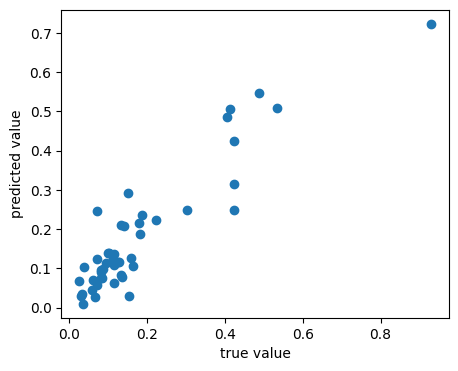

In [87]:
plt.scatter(y, y_pred_train)
plt.xlabel("true value")
plt.ylabel("predicted value")

Text(0, 0.5, 'predicted value')

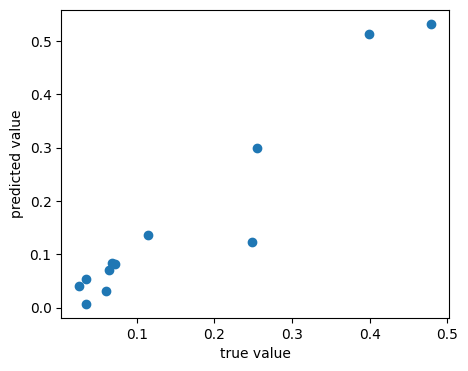

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("true value")
plt.ylabel("predicted value")

### Test set: seen model, unseen dataset

In [48]:
model_type =  pd.get_dummies(data['model'])
data_temp = data.merge(model_type, how='outer',left_index=True, right_index=True)
test_data = data_temp[(data_temp['dataset']=='m4_monthly') | (data_temp['dataset']=='solar-energy')].reset_index(drop=True).drop(['model', 'dataset'], axis=1)
train_data = data_temp[(data_temp['dataset']!='m4_monthly') & (data_temp['dataset']!='solar-energy')].reset_index(drop=True).drop(['model', 'dataset'], axis=1)
reg = LinearRegression().fit(train_data.drop(['error'], axis=1), train_data['error'])

In [65]:
test_data.shape

(13, 32)

In [50]:
X_test = test_data.drop(['error'], axis=1)
y_test = test_data['error']

In [52]:
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(train_data.drop(['error'], axis=1))

In [11]:
# print('mse prediction:',mean_squared_error(y, clf.predict(X)))
# print("R2 score prediction", r2_score(y, clf.predict(X)))

mse prediction: 0.02077158427613918
R2 score prediction 0.30000638039537475


In [57]:

print('MSE:',mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.11665734437567268
R2 score: -1.1167135021320829


In [56]:
print('MSE:',mean_squared_error(train_data['error'], y_pred_train))
print("R2 score:", r2_score(train_data['error'], y_pred_train))

MSE: 0.003070154474850132
R2 score: 0.7042720034313935


Coefficients

In [60]:
temp = pd.DataFrame()
temp['features'] = list(train_data.drop(['error'], axis=1).columns)
temp['coefficient'] = reg.coef_
temp

,features,coefficient
0,DN_HistogramMode_5,0.007171
1,DN_HistogramMode_10,0.011753
2,CO_f1ecac,-0.049178
3,CO_FirstMin_ac,0.000387
4,CO_HistogramAMI_even_2_5,-0.009272
5,CO_trev_1_num,-0.002056
6,MD_hrv_classic_pnn40,-0.002764
7,SB_BinaryStats_mean_longstretch1,0.020809
8,SB_TransitionMatrix_3ac_sumdiagcov,0.000865
9,PD_PeriodicityWang_th0_01,-0.001315


In [78]:
plt.rcParams["figure.figsize"] = (5,4)

Text(0, 0.5, 'predicted value')

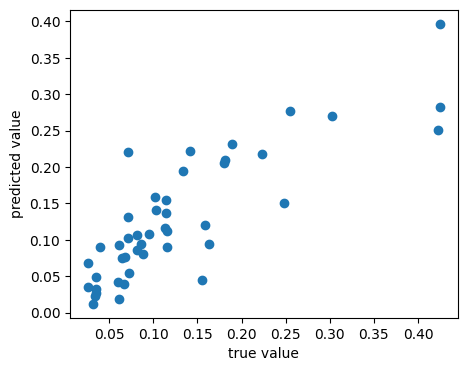

In [79]:
plt.scatter(train_data['error'], y_pred_train)
plt.xlabel("true value")
plt.ylabel("predicted value")

Text(0, 0.5, 'predicted value')

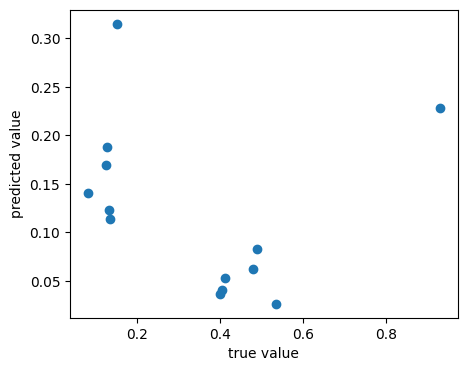

In [80]:
plt.scatter(y_test, y_pred)
plt.xlabel("true value")
plt.ylabel("predicted value")

#### seen data, unseen model

In [3]:
df = pd.read_csv("df.csv")
catch22 = pd.read_csv("catch22.csv")
data = df.merge(catch22, how='left', on="dataset")



In [4]:
test_data = data[(data['model']=='linformer')|(data['model']=='Informer')].reset_index(drop=True).drop(['model', 'dataset'], axis=1)
train_data = data[(data['model']!='linformer')&(data['model']!='Informer')].reset_index(drop=True).drop(['model', 'dataset'], axis=1)
reg = LinearRegression().fit(train_data.drop(['error'], axis=1), train_data['error'])



In [6]:
X_test = test_data.drop(['error'], axis=1)
y_test = test_data['error']
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(train_data.drop(['error'], axis=1))

In [8]:
train_data.shape

(47, 23)

In [7]:

print("Test data")
print('MSE:',mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))
print("Train data")
print('MSE:',mean_squared_error(train_data['error'], y_pred_train))
print("R2 score:", r2_score(train_data['error'], y_pred_train))

Test data
MSE: 0.0025537650570267665
R2 score: 0.8655729155435347
Train data
MSE: 0.009593137161819719
R2 score: 0.6779386154457354


Text(0, 0.5, 'predicted value')

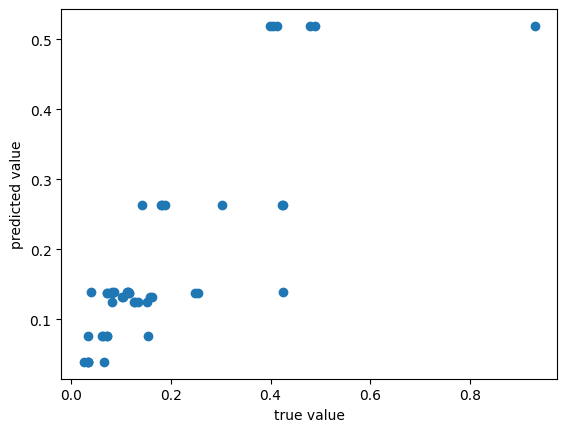

In [9]:
plt.scatter(train_data['error'], y_pred_train)
plt.xlabel("true value")
plt.ylabel("predicted value")

Text(0, 0.5, 'predicted value')

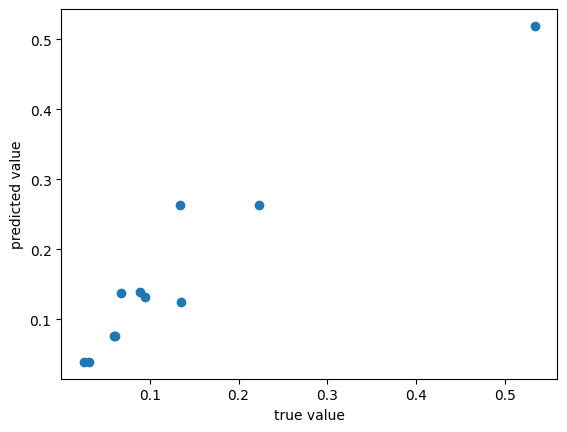

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("true value")
plt.ylabel("predicted value")

#### unseen data, unseen model

In [26]:
df = pd.read_csv("df.csv")
catch22 = pd.read_csv("catch22.csv")
data = df.merge(catch22, how='left', on="dataset")
model_type =  pd.get_dummies(data['model'])
data_temp = data.merge(model_type, how='outer',left_index=True, right_index=True)
test_data = data_temp[((data_temp['model']=='linformer')|(data_temp['model']=='Informer') | (data_temp['model']=='nystorm')) & ((data_temp['dataset']=='m4_quarterly') | (data_temp['dataset']=='m4_weekly') | (data_temp['dataset']=='m4_daily'))].reset_index(drop=True).drop(['model', 'dataset'], axis=1)
train_data = data_temp[(data_temp['model']!='linformer')&(data_temp['model']!='Informer')&(data_temp['model']!='nystorm')&(data_temp['dataset']!='m4_quarterly')& (data_temp['dataset']!='m4_weekly') & (data_temp['dataset']!='m4_daily')].reset_index(drop=True).drop(['model', 'dataset'], axis=1)

train_x = train_data.drop(['error'],axis=1)
train_y = train_data['error']
test_x = test_data.drop(['error'], axis=1)
test_y = test_data['error']


reg = LinearRegression().fit(train_x, train_y)
y_pred = reg.predict(test_x)
y_pred_train = reg.predict(train_x)
print("Test data")
print('mse prediction:',mean_squared_error(test_y, y_pred))
print("R2 score prediction", r2_score(test_y, y_pred))
print("Train data")
print('mse prediction:',mean_squared_error(train_y, y_pred_train))
print("R2 score prediction", r2_score(train_y, y_pred_train))


Test data
mse prediction: 161.0154794494701
R2 score prediction -228523.05479390873
Train data
mse prediction: 0.00494470582917459
R2 score prediction 0.8728741011675101


In [27]:
train_x.shape

(28, 31)

In [28]:
data_temp[((data_temp['model']=='linformer')|(data_temp['model']=='Informer') | (data_temp['model']=='nystorm')) & ((data_temp['dataset']=='m4_quarterly') | (data_temp['dataset']=='m4_weekly') | (data_temp['dataset']=='m4_daily'))].reset_index(drop=True)

,model,error,dataset,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,...,FC_LocalSimple_mean3_stderr,Hopfield,Informer,etsformer,favor,linformer,nystorm,switch,transformer,xformer
0,Informer,0.031202,m4_daily,-0.172686,-0.206331,290.202151,720.344689,1.074898,-0.029044,0.434763,...,0.124719,0,1,0,0,0,0,0,0,0
1,Informer,0.060738,m4_weekly,-0.377490,-0.441451,126.895132,326.000000,0.796780,0.008714,0.532645,...,0.296566,0,1,0,0,0,0,0,0,0
2,nystorm,0.061235,m4_weekly,-0.377490,-0.441451,126.895132,326.000000,0.796780,0.008714,0.532645,...,0.296566,0,0,0,0,0,1,0,0,0
3,nystorm,0.101569,m4_quarterly,-0.297725,-0.318503,14.149457,35.428250,0.760510,-0.010422,0.755289,...,0.386407,0,0,0,0,0,1,0,0,0
4,linformer,0.025571,m4_daily,-0.172686,-0.206331,290.202151,720.344689,1.074898,-0.029044,0.434763,...,0.124719,0,0,0,0,1,0,0,0,0
5,linformer,0.060072,m4_weekly,-0.377490,-0.441451,126.895132,326.000000,0.796780,0.008714,0.532645,...,0.296566,0,0,0,0,1,0,0,0,0
6,linformer,0.094941,m4_quarterly,-0.297725,-0.318503,14.149457,35.428250,0.760510,-0.010422,0.755289,...,0.386407,0,0,0,0,1,0,0,0,0


In [10]:
###lasso

In [33]:
for train_index, test_index in sss.split(data.drop(['model'], axis=1), data['code']):
     model_type =  pd.get_dummies(data['model'])
     data_temp = data.merge(model_type, how='outer',left_index=True, right_index=True)
     data_temp = data_temp.drop(['model'], axis=1)
     X = np.array(data_temp.drop(['error','code'], axis=1))[train_index]
     y = np.array(data_temp['error'])[train_index]
     

     sc = StandardScaler()
     X_scaled = sc.fit_transform(X)
     # X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
     cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
     lasso_alphas = np.linspace(0, 0.2, 21)
     lasso = Lasso()
     grid = dict()
     grid['alpha'] = lasso_alphas
     gscv = GridSearchCV( lasso, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
     results = gscv.fit(X_scaled, y)
     print('MSE: %.5f' % results.best_score_)
     print('Config: %s' % results.best_params_)

MSE: -0.01101
Config: {'alpha': 0.01}


In [34]:

#elastic net


for train_index, test_index in sss.split(data.drop(['model'], axis=1), data['code']):
    model_type =  pd.get_dummies(data['model'])
    data_temp = data.merge(model_type, how='outer',left_index=True, right_index=True)
    data_temp = data_temp.drop(['model'], axis=1)
    X = np.array(data_temp.drop(['error','code'], axis=1))[train_index]
    y = np.array(data_temp['error'])[train_index]


    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)
    # X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
    param_grid = [
    {'alpha': np.linspace(0, 0.2, 21), 'l1_ratio': [0, 0.2, .5, .8, 1]},]
    elastic_net = ElasticNet()
    grid_search = GridSearchCV(elastic_net, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
    grid_search.fit(X, y)
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)





/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.189e-02, tolerance: 1.234e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

0.11702335471516814 {'alpha': 0.0, 'l1_ratio': 0}
0.11702335471516814 {'alpha': 0.0, 'l1_ratio': 0.2}
0.11702335471516814 {'alpha': 0.0, 'l1_ratio': 0.5}
0.11702335471516814 {'alpha': 0.0, 'l1_ratio': 0.8}
0.11702335471516814 {'alpha': 0.0, 'l1_ratio': 1}
0.110933616085592 {'alpha': 0.01, 'l1_ratio': 0}
0.11006204123310026 {'alpha': 0.01, 'l1_ratio': 0.2}
0.11807012644247596 {'alpha': 0.01, 'l1_ratio': 0.5}
0.12821428012611055 {'alpha': 0.01, 'l1_ratio': 0.8}
0.1323320721855181 {'alpha': 0.01, 'l1_ratio': 1}
0.11039618398465617 {'alpha': 0.02, 'l1_ratio': 0}
0.11767774582459965 {'alpha': 0.02, 'l1_ratio': 0.2}
0.13261160613379533 {'alpha': 0.02, 'l1_ratio': 0.5}
0.13817815906597844 {'alpha': 0.02, 'l1_ratio': 0.8}
0.14141018070594819 {'alpha': 0.02, 'l1_ratio': 1}
0.11100105368984274 {'alpha': 0.03, 'l1_ratio': 0}
0.12439777327958848 {'alpha': 0.03, 'l1_ratio': 0.2}
0.13780938557498212 {'alpha': 0.03, 'l1_ratio': 0.5}
0.14482955955101484 {'alpha': 0.03, 'l1_ratio': 0.8}
0.1461998082427

/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e-01, tolerance: 1.234e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/ccs/proj/csc499/hstellar/rapids/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e-01, tolerance: 6.256e-05 Linear regression models with null weight for the l1 regularization term are more efficiently

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [ ]:
plot_learning_curves(lasso,X,y)
plt.show()

In [ ]:
plot_learning_curves(elastic_net,X,y)
plt.show()